**Brayan Valencia Quintero**

Tarea Procesamiento Digital de Imagenes

# **Metrica de desempeño  de huber**

En estadística, la pérdida de Huber es una función de pérdida utilizada en la regresión robusta, que es menos sensible a los valores atípicos de los datos que la pérdida de error al cuadrado. A veces también se utiliza una variante para la clasificación

La función de pérdida de Huber describe la penalización incurrida por un procedimiento de estimación f . Huber (1964) define la función de pérdida por partes 

$$L_\delta(a)= \left\lbrace
\begin{array}{ll}
\frac{1}{2}a^2 \ \ \ \ \ para \ \ \ |a|\le δ & \\
\delta *(|a|-\frac{1}{2}\delta) \ \ \ \ de \ lo  \ contrario
\end{array}
\right.$$

Esta función es cuadrática para valores pequeños de a y lineal para valores grandes, con valores y pendientes iguales de las diferentes secciones en los dos puntos donde $|a|=\delta$. La variable a a menudo se refiere a los residuos, es decir, a la diferencia entre los valores observados y predichos.$a = y-f(x)$, por lo que el primero se puede expandir a

$$L_\delta(y, f(x))= \left\lbrace
\begin{array}{ll}
\frac{1}{2}(y-f(x))^2 \ \ \ \ \ para \ \ \ |y-f(x)|\le δ & \\
\delta *(|y-f(x)|-\frac{1}{2}\delta) \ \ \ \ de \ lo  \ contrario
\end{array}
\right.$$

**La función de pérdida de Huber se utiliza en estadísticas robustas , estimación M y modelado aditivo**

# **Area bajo la curva ROC**

La curva AUC - ROC es una medida de rendimiento para los problemas de clasificación en varias configuraciones de umbral. ROC es una curva de probabilidad y AUC representa el grado o medida de separabilidad. Indica cuánto es capaz el modelo de distinguir entre clases. Cuanto mayor sea el AUC, mejor será el modelo para predecir 0 clases como 0 y 1 clases como 1. Por analogía, cuanto mayor sea el AUC, mejor será el modelo para distinguir entre pacientes con la enfermedad y sin enfermedad.

La curva ROC se traza con TPR contra FPR, donde TPR está en el eje y y FPR está en el eje x.



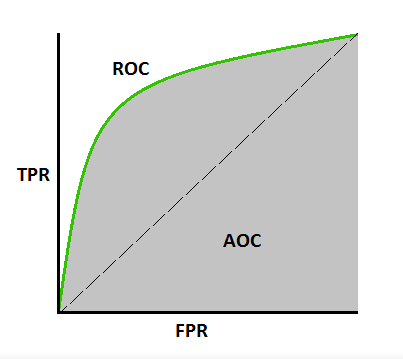

**Definición de términos utilizados en la curva AUC y ROC.**

TPR (Tasa de verdaderos positivos) / Recuperación / Sensibilidad

$$TPR/Recall/Sensitivity=\frac{TP}{TP+FN}$$


**especificidad**

$$Specificity= \frac{TN}{TN+FP}$$

**FPR**

$$FPR=1- Specificity$$

$$=\frac{FP}{TN+FP}$$



La curva ROC se comenzó a utilizar durante la Segunda Guerra Mundial para el análisis de señales de radar, a partir de lo cual se desarrolló la Teoría de Detección de Señales. Después del ataque a Pearl Harbor en 1941, el ejército de los Estados Unidos comenzó un programa de investigación para detectar correctamente los aparatos japoneses a partir de sus señales de radar.

En los años 50, las curvas ROC se utilizaron en Psicofísica para evaluar la capacidad de detección de humanos (y también de no humanos) en señales débiles. En medicina el análisis ROC se ha utilizado de forma muy extensa en epidemiología e investigación médica, de tal modo que se encuentra muy relacionado con la medicina basada en la evidencia. En radiología, el análisis ROC es la técnica de preferencia para evaluar nuevas técnicas de diagnóstico por imagen.

Más recientemente, las curvas ROC se han mostrado muy útiles para la evaluación de técnicas de aprendizaje automático. La primera aplicación de las ROC en esta área fue por Spackman, quien demostró el valor de las curvas ROC para la comparación de diferentes algoritmos de clasificación.

# **Como se generalizan las medidas de desempeño para clasificacion binaria anteriormete vistas a tareas multi-clase y multi-salida**


Los datos se tratan entonces como una coleccion de problemas binarios, uno para cada clase. Luego, hay varias formas de promediar los cálculos de métricas binarias en el conjunto de clases.

Formas: seccion(3.3.2.1) https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter




**Presicion**

En la clasificación multietiqueta, la función devuelve la precisión del subconjunto. Si todo el conjunto de etiquetas pronosticadas para una muestra coincide estrictamente con el verdadero conjunto de etiquetas, entonces la precisión del subconjunto es 1,0; de lo contrario es 0.0.


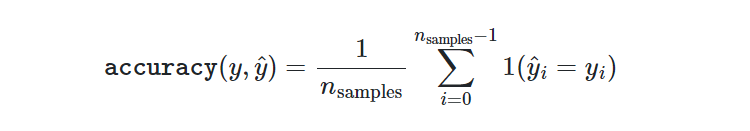

**^y** : Valores predichos de las muestras

**y** : Valor verdadero correspondiente


```
#Funcion accuracy_score de sklearn.metrics
>>> import numpy as np
>>> from sklearn.metrics import accuracy_score
>>> y_pred = [0, 2, 1, 3]
>>> y_true = [0, 1, 2, 3]
>>> accuracy_score(y_true, y_pred)
0.5
>>> accuracy_score(y_true, y_pred, normalize=False)
2
```

En el caso de multiples etiquetas con indicadores de etiqueta binarias:
```
>>> accuracy_score(np.array([[0, 1], [1, 1]]), np.ones((2, 2)))
0.5
```

**Matriz de Confusion**

Evalúa la precisión de la clasificación calculando la matriz de confusión con cada fila correspondiente a la clase verdadera.

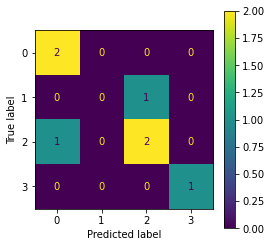

In [31]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib as plt
y_true = [2, 0, 2, 2, 0, 1,3]
y_pred = [0, 0, 2, 2, 0, 2,3]
k=confusion_matrix(y_true, y_pred)
d = ConfusionMatrixDisplay(confusion_matrix=k)
d.plot()


**ROC-AUC**

En clasificacion multiclase se admiten dos estrategias de promedio: el algoritmo uno contra uno que calcula el promedio de las puntuaciones de AUC de ROC por pares, y el algoritmo uno contra el resto que calcula el promedio de las puntuaciones de AUC de ROC para cada clase frente a todas las demás clases. En ambos casos, las etiquetas pronosticadas se proporcionan en una matriz con valores de 0 al numero de clases y las puntuaciones corresponden a las estimaciones de probabilidad de que una muestra pertenece a una clase particular.

**Uno contra uno:**

Calcula el AUC promedio de todas las posibles combinaciones de clases por pares.

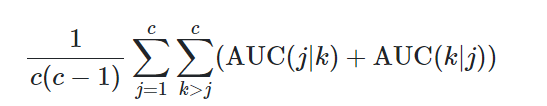

c: Numero de clases 

AUC( j | k ): AUC con clase j como clase positiva y la clase k como clase negativa.

**Uno contra el resto:**

 Calcula el AUC de cada clase contra el resto

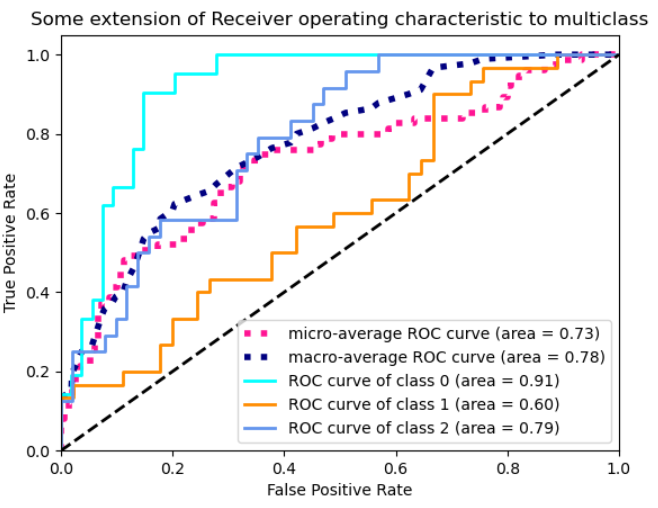

#Clase con Metricas sin librerias:

In [32]:
#librerias necesarias
import numpy as np
import random
import matplotlib.pyplot as plt

In [33]:
class Metricas:
  """
  metric class without using libraries
  mse
  msa
  precision
  exactitud
  exahustividad
  loss_Huber
  AUC
  Matriz_confusion

  """

  def __init__(self):
    pass

  def mse(self, Y, Y_): # Error cuadratico medio
    self.Y = Y
    self.Y_ = Y_

    N = len(self.Y)
    total = 0
    if Y.shape != self.Y_.shape or self.Y.ndim != self.Y_.ndim or self.Y_.ndim != 1 or self.Y.ndim != 1: #Validacion tamaño y dimension
      print("El tamaño de los arreglos debe ser el mismo y la dimension debe ser igual una en cada caso.")
    else:
      for i in range(N):
              
        loss = self.Y[i] - self.Y_[i]       
        mse = (loss)**2
        total += mse
    return total/N
  
  def mae(self,Y, Y_): #Error Absoluto Medio
    self.Y = Y
    self.Y_ = Y_
    N = len(self.Y)
    if Y.shape != self.Y_.shape or self.Y.ndim != self.Y_.ndim or self.Y_.ndim != 1 or self.Y.ndim != 1: #Validacion tamaño y dimension
      print("El tamaño de los arreglos debe ser el mismo y la dimension debe ser igual una en cada caso.")
    else:     
      total = 0
      for i in range(N):
          
        loss = abs(self.Y[i] - self.Y_[i])       
        total += loss
    return total/N

  def exactitud(self, Y, Y_, n_clases):
    N = Y.shape[1]
    self.Y = Y
    self.Y_ = Y_
    clases = np.arange(0,n_clases,1)
    #= np.arange(0,1,0.1)
   
    for i in range(N):
      count_clase=0      
      for j in range(N):      
        comp= self.Y[i]==self.Y_[j]
        if Y[i]==Y_[j]:         
          count_clase += 1
      clases[Y[i]-1] = count_clase
      suma = np.sum(clases)
    return print("Exactitud: ", suma/N, "conteo por clases: ", clases)


  def loss_Huber(self, Y, Y_, delta): #delta: R+ que determina los rangos de la funcion por partes.

    self.Y = Y
    self.Y_ = Y_
    self.delta = delta
  

    if Y.shape != self.Y_.shape or self.Y.ndim != self.Y_.ndim or self.Y_.ndim != 1 or self.Y.ndim != 1: #Validacion tamaño y dimension
      print("El tamaño de los arreglos debe ser el mismo y la dimension debe ser igual una en cada caso.")

    else:
      
      N = len(self.Y)
      total = 0
      for i in range(N):
        
        if abs(self.Y[i] - self.Y_[i]) <= self.delta:
          loss = self.Y[i] - self.Y_[i]       
          loss_huber = (loss/2)**2
          total += loss_huber

        else:
          loss = self.Y[i] - self.Y_[i]     
          loss_huber = self.delta*(abs(self.Y[i] - self.Y_[i])-(1/2)*self.delta)
          total = total + loss_huber
  
    return total/N

  def AUC_bin(self, Y, Y_ ):
    #pend. Validacion o binarizacion de las entradas np.where(a>1)

    N = len(Y_)
    Matriz = np.zeros((2,2)) 
    VP = 0
    VN = 0
    FP = 0
    FN = 0
    umbral = np.arange(0,1,0.1)
    y = np.zeros(len(umbral))
    x = np.zeros(len(umbral))
    ciclo = 0
    vector_du = np.zeros(10)
    vector_du.fill(0.1)

    Y_bin = np.zeros(len(Y))

    if Y.shape != Y_.shape or Y.ndim != Y_.ndim or Y_.ndim != 1 or Y.ndim != 1: #Validacion
      print("El tamaño de los arreglos debe ser el mismo y la dimension debe ser igual una en cada caso.")
    else:
        for j in umbral:  #Variacion del umbral 0.0 - 1.0
          
          Y_bin[np.where(Y_ >= j)] = 1 #Binarizacion del conjunto de valores de prediccion 
          Y_bin[np.where(Y_ < j)] = 0  # ""

          for i in range(N):# Recorrido completo de los vectores
            if Y[i]==1 and Y_bin[i]==1:
              VP += 1
            elif Y[i]==1 and Y_bin[i]==0:
              FN += 1
            elif Y[i]==0 and Y_bin[i]==0:
              VN += 1
            else:
              FP += 1

            Matriz[1,1] = VP
            Matriz[0,1] = FN
            Matriz[1,0] = FP
            Matriz[0,0] = VN

          if (VP + FN) != 0:
            VPR = VP/(VP+FN)#Razon de verdaderos postivos (Sensibilidad -Recall)
            y[ciclo] = VPR
          else: 
            VPR = 0
            y[ciclo] = VPR
          if (FP+VN)!=0:
            FPR=FP/(FP+VN)#Razon de falsos postivos (1 - Especifidad )
            x[ciclo] = FPR
          else: 
            FPR = 0
            x[ciclo] = FPR
          ciclo += 1 

        Area = np.dot(y,vector_du.reshape(-1)) 
        
        plt.title(str(Area))   
        plt.rcParams["figure.figsize"] = (4, 4)
        plt.plot(x,y)
        
        
        
        

  def Matriz_confusion(self, Y, Y_, n_clases=2):
    
    N = Y.shape[1]
    Matriz = np.zeros((n_clases,n_clases)) 
    M=np.concatenate((Y, Y_))
    true  = np.asarray([True, True])
    for i in range(N):
      count=0
      for j in range(N):
        comp = M[:,i]==M[:,j]
        if comp[0]==True and comp[1]==True:
          count +=1 
      f = M[1,i]
      c = M[0,i]
      Matriz[f,c]=count

    plt.imshow(Matriz)

    for i in range(n_clases):
      for j in range(n_clases):
        text = int(Matriz[i,j])
        plt.text(i, j, text, fontsize=10, color='black')
        

    plt.yticks(range(0, n_clases, 1))
    plt.xticks(range(0, n_clases, 1))
    plt.xlabel("Predicted label")
    plt.ylabel("True label")  
    plt.colorbar()
    plt.show()

#Prueba

Error cuadratico medio MSE

In [34]:
desempeño = Metricas()

X = np.array([ 1,    1,   0,   0 , 0,   1,   0,   1,   1]) # y true
X_ = np.array([0.9, 0.9, 0.2, 0.1, 0.5, 300, 0.1, 0.7,0.6]) #y predict

desempeño.mse(X,X_)

9933.50888888889

Error absoluto medio MAE

In [35]:
desempeño = Metricas()

X = np.array([ 1,    1,   0,   0 , 0,   1,   0,   1,   1]) # y true
X_ = np.array([0.9, 0.9, 0.2, 0.1, 0.5, 300, 0.1, 0.7,0.6]) #y predict

desempeño.mae(X,X_)

33.422222222222224

Exactitud

In [36]:
# desempeño = Metricas()

# X = np.array([[1, 1, 2, 1, 0, 2, 0, 1, 1, 1,3]]) # y true
# X_ = np.array([[1, 1, 2, 1, 0, 2, 0, 1, 1,1,3]]) # y predict 

# desempeño.exactitud(X,X_,4)

Loss- Huber

In [37]:
X = np.array([ 1,    1,   0,   0 , 0,   1,   0,   1,   1]) # y true
X_ = np.array([0.9, 0.9, 0.2, 0.1, 0.5, 0.8, 0.1, 0.7,0.6]) #y predict

desempeño = Metricas()
desempeño.loss_Huber(X, X_, 0.2)

0.023333333333333334

ROC - AUC (binario)

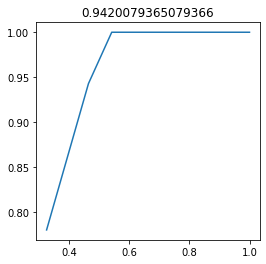

In [38]:
X = np.array([ 1,    1,   0,   0 , 0,   1,   0,   1,   1]) # y true
X_ = np.array([0.9, 0.9, 0.2, 0.1, 0.6, 0.5, 0.1, 0.7,0.6]) #y predict
#X_ = np.array([ 1,    1,   0,   0 , 0,   1,   0,   1,   1]) # y true
desempeño = Metricas()
desempeño.AUC_bin(X, X_)

Matriz de confusion multiclase

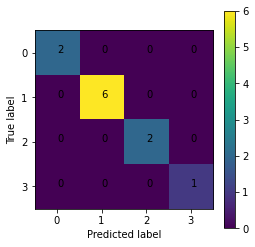

In [39]:
X = np.array([[1, 1, 2, 1, 0, 2, 0, 1, 1, 1,3]]) # y true
X_ = np.array([[1, 1, 2, 1, 0, 2, 0, 1, 1,1,3]]) # y predict 
desempeño.Matriz_confusion(X,X_,4)

#Clase con Metricas usando los paquetes de Sklearn.

In [40]:
from os import EX_CANTCREAT
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [41]:


class Metricas2:
  """
  metric class with sklearn libraries
  MSE
  MAE
  Exactitud
  loss_Huber
  AUC
  Sensibilidad
  Precision
  F1_score
  Matriz_confusion
  """

  def __init__(self):
    pass

  def mse(self, Y, Y_): # Error cuadratico medio
    mse = mean_squared_error(Y, Y_)
    return(round(mse,2))
   
  
  def mae(self,Y, Y_): #Error Absoluto Medio
    mae = mean_absolute_error(Y, Y_)
    return(mae)
   
  def exactitud(self, Y, Y_, n_clases):
    exact = accuracy_score(Y, Y_)
    return(exact)    

  #def loss_Huber(self, Y, Y_, delta): #delta: R+ que determina los rangos de la funcion por partes.

  def AUC_bin(self, Y, Y_ ):
    auc = roc_auc_score(Y, Y_)
    return(auc)

  def sensibilidad(self, Y, Y_):
    sens = recall_score(Y, Y_)
    return(sens)
  
  def precision(self, Y, Y_):
    precision = precision_score(Y,Y_)
    return(precision)
    
    
  def f1_score(self, Y, Y_):
    f1 = f1_score(Y, Y_)
    return(f1)   


  def Multilabel_Matriz_confusion(self, Y, Y_, n_clases=2):
    mat = multilabel_confusion_matrix(Y,Y_)
    return mat

  def Matriz_confusion(self, Y, Y_, n_clases=2):
    mat = confusion_matrix(Y,Y_)
    plt.imshow(mat)
    for i in range(n_clases):
      for j in range(n_clases):
        text = int(mat[i,j])
        plt.text(i, j, text, fontsize=10, color='black')
    plt.yticks(range(0, n_clases, 1))
    plt.xticks(range(0, n_clases, 1))
    plt.xlabel("Predicted label")
    plt.ylabel("True label")  
    plt.colorbar()
    plt.show()

**Prueba**

Error cuadratico medio MSE

In [42]:
desempeño = Metricas2()

X = np.array([ 1,    1,   0,   0 , 0,   1,   0,   1,   1]) # y true
X_ = np.array([0.9, 0.9, 0.2, 0.1, 0.5, 300, 0.1, 0.7,0.6]) #y predict

desempeño.mse(X,X_)

9933.51

Error absoluto medio MAE

In [43]:
desempeño = Metricas2()

X = np.array([ 1,    1,   0,   0 , 0,   1,   0,   1,   1]) # y true
X_ = np.array([0.9, 0.9, 0.2, 0.1, 0.5, 300, 0.1, 0.7,0.6]) #y predict

desempeño.mae(X,X_)

33.42222222222222

Exactitud

In [44]:
# desempeño = Metricas2()

# X = np.array([[1, 1, 2, 1, 0, 2, 0, 1, 1, 1,3]]) # y true
# X_ = np.array([[1, 1, 2, 1, 0, 2, 0, 1, 1,1,3]]) # y predict 

# desempeño.exactitud(X,X_,4)

AUC

In [45]:
X = np.array([ 1,    1,   0,   0 , 0,   1,   0,   1,   1]) # y true
X_ = np.array([0.9, 0.9, 0.2, 0.1, 0.6, 0.5, 0.1, 0.7,0.6]) #y predict
#X_ = np.array([ 1,    1,   0,   0 , 0,   1,   0,   1,   1]) # y true
desempeño = Metricas2()
desempeño.AUC_bin(X, X_)

0.925

Matriz de confusion multiclase

In [46]:
X = np.array([2, 0, 2, 2, 0, 1]) # y true
X_ = np.array([0, 0, 2, 2, 0, 2]) # y predict 


desempeño = Metricas2()
desempeño.Multilabel_Matriz_confusion(X,X_)

array([[[3, 1],
        [0, 2]],

       [[5, 0],
        [1, 0]],

       [[2, 1],
        [1, 2]]])

#Clase con Metricas usando los paquetes de Keras.

In [47]:
#from tensorflow import metrics
from keras import metrics
import keras as k


In [53]:
class Metricas3:
  """
  metric class with keras libraries
  MSE
  MAE
  Exactitud
  loss_Huber
  AUC
  Sensibilidad
  Precision
  F1_score
  Matriz_confusion
  """

  def __init__(self):
    pass

  def mse(self, Y, Y_): # Error cuadratico medio
    mse = metrics.mean_squared_error(Y, Y_)
    return(mse)
   
  
  def mae(self,Y, Y_): #Error Absoluto Medio
    mae = metrics.mean_absolute_error(Y, Y_)
    return(mae)
   
  def exactitud(self, Y, Y_, n_clases):
    exact = metrics.binary_accuracy(Y, Y_)
    return(exact)    

  #def loss_Huber(self, Y, Y_, delta): #delta: R+ que determina los rangos de la funcion por partes.

  def AUC_bin(self, Y, Y_ ):
    auc = metrics.AUC(Y, Y_, num_thresholds=200,curve='ROC')
    return(auc)

  def sensibilidad(self, Y, Y_):
    Y =  K.ones_like(Y)
    positives =  K.sum(K.round(K.clip(Y* Y_, 0, 1)))
    all_positives = K.sum(K.round(K.clip(Y, 0, 1)))
    sens = positives / (all_positives + K.epsilon())
    return(sens)

 
  def precision(self, Y, Y_):
    Y =K.ones_like(Y) 
    positives = K.sum(K.round(K.clip(Y * Y_, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(Y, 0, 1)))
    precision =positives / (predicted_positives + K.epsilon())

    return(precision)

   

  def Matriz_confusion(self, Y, Y_, n_clases=2):
    mat = metrics.confusion_matrix(Y,Y_)
    return mat

**Pruebas**

Error cuadratico medio MSE

In [49]:
desempeño = Metricas3()

X = np.array([ 1,    1,   0,   0 , 0,   1,   0,   1,   1]) # y true
X_ = np.array([0.9, 0.9, 0.2, 0.1, 0.5, 300, 0.1, 0.7,0.6]) #y predict

desempeño.mse(X,X_)

<tf.Tensor: shape=(), dtype=float64, numpy=9933.50888888889>

Error absoluto medio MAE

In [50]:
desempeño = Metricas3()

X = np.array([ 1,    1,   0,   0 , 0,   1,   0,   1,   1]) # y true
X_ = np.array([0.9, 0.9, 0.2, 0.1, 0.5, 300, 0.1, 0.7,0.6]) #y predict

desempeño.mae(X,X_)

<tf.Tensor: shape=(), dtype=float64, numpy=33.42222222222222>